In [25]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd

from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

In [26]:
gas_uor = [2.23, 2.31, 5.47, 5.04, 5.11, 5.46, 5.46, 5.31, 5.64, 5.47, 5.55, 5.28, 5.33, 5.47, 4.12, 2.66, 2.51, 2.06, 1.65, 1.67, 1.44]

In [27]:
df = pd.DataFrame()

df['value'] = gas_uor

df['value']

0     2.23
1     2.31
2     5.47
3     5.04
4     5.11
5     5.46
6     5.46
7     5.31
8     5.64
9     5.47
10    5.55
11    5.28
12    5.33
13    5.47
14    4.12
15    2.66
16    2.51
17    2.06
18    1.65
19    1.67
20    1.44
Name: value, dtype: float64

In [28]:
result = adfuller(gas_uor)

print(result)

(-0.9184495182267546, 0.7818360271433638, 0, 20, {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}, 21.62346932034019)


In [29]:
print('ADF Statistics: %f' % result[0])

ADF Statistics: -0.918450


In [30]:
# p-value > 0.05, time series is not stationary
print('p-value: %f' % result[1])

p-value: 0.781836


In [31]:
y = df.value

print(ndiffs(y, test="adf"))

print(ndiffs(y, test="kpss"))

print(ndiffs(y, test="pp"))

2
0
1


In [32]:
stepwise_fit = auto_arima(df.value, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=57.918, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83.619, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=59.455, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=69.159, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=123.507, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=63.114, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=63.194, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=62.591, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=61.192, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=65.118, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.576 sec

In [50]:
stepwise_fit = auto_arima(train, trace=True, supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44.563, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.834, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=38.786, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=38.859, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=74.680, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=40.642, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=40.596, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=42.568, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=40.308, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.767 seconds


In [33]:
print(df.shape)

(21, 1)


In [34]:
train = df.iloc[:-9]
test = df.iloc[-9:]

In [35]:
print(train.shape, test.shape)

(12, 1) (9, 1)


In [95]:
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                 -16.393
Method:                       css-mle   S.D. of innovations              0.922
Date:                Wed, 01 Dec 2021   AIC                             38.786
Time:                        11:11:10   BIC                             40.241
Sample:                             0   HQIC                            38.247
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5496      0.799      5.697      0.000       2.984       6.115
ar.L1.value     0.7015      0.241      2.911      0.004       0.229       1.174
                                    Roots       

C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


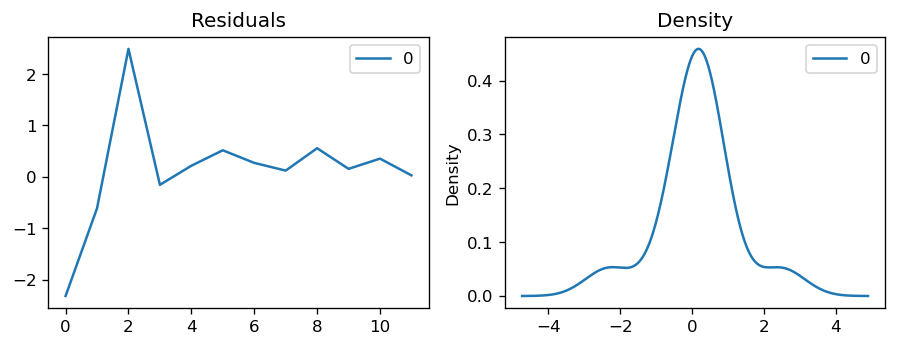

In [96]:
# checking residual error
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind="kde", title="Density", ax=ax[1])
plt.show()

12    5.061982
13    4.909039
14    4.801748
15    4.726482
16    4.673682
17    4.636641
18    4.610657
19    4.592429
20    4.579642
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

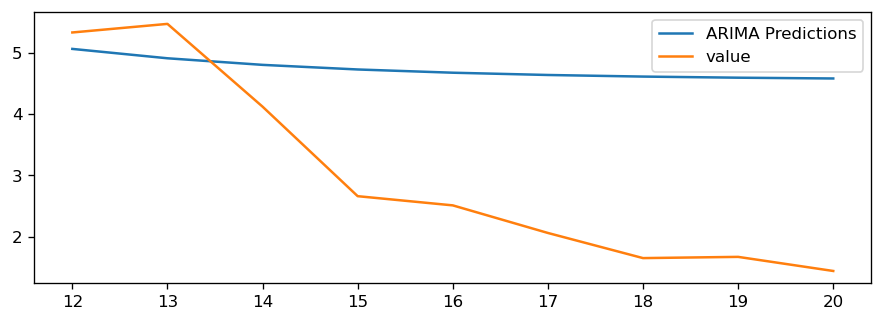

In [97]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')
print(pred)
pred.plot(legend=True)
test['value'].plot(legend=True)

In [98]:
# accuracy metric
test_mean = test.value.mean()
print(test_mean)
rmse = sqrt(mean_squared_error(pred, test['value']))
print(rmse)
accuracy = rmse/test_mean * 100
print('Average Error:  ' + str(accuracy) + '%')

2.99
2.2011530632091043
Average Error:  73.61715930465232%


C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   12
Model:                     ARMA(1, 0)   Log Likelihood                 -16.393
Method:                       css-mle   S.D. of innovations              0.922
Date:                Wed, 01 Dec 2021   AIC                             38.786
Time:                        11:11:12   BIC                             40.241
Sample:                             0   HQIC                            38.247
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5496      0.799      5.697      0.000       2.984       6.115
ar.L1.value     0.7015      0.241      2.911      0.004       0.229       1.174
                                    Roots       

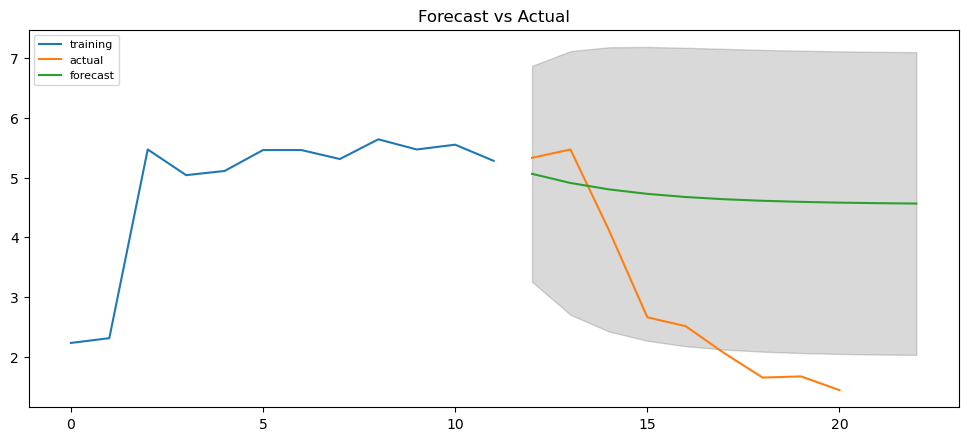

In [99]:
# Build Model
model = ARIMA(train, order=(1,0,0))
fitted = model.fit()
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(11, alpha=0.05) #95% confidence interval

# Make as pandas series
fc_series = pd.Series(fc)
fc_series.index = np.arange(12, 23)
lower_series = pd.Series(conf[:, 0], index=fc_series.index)
upper_series = pd.Series(conf[:, 1], index=fc_series.index)

print(fc_series)

# Plot
fig_final = plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actual')
plt.legend(loc="upper left", fontsize=8)
plt.show()